In [1]:
# install necessary packages
import numpy as np
import matplotlib.pyplot as plt

#install sklearn modules
from sklearn import datasets,svm, metrics, linear_model
from sklearn.model_selection import train_test_split

In [2]:
#Let's load the data and look at how it is structured:
digits = datasets.load_digits()
print(type(digits))

<class 'sklearn.utils.Bunch'>


In [3]:
#You can see here digits is a type of dictionary where the value of the dicionary elements are numpy arrays.
digits


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [4]:
print(type(digits['data']))
print(type(digits['target']))
print(digits['DESCR'])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and 

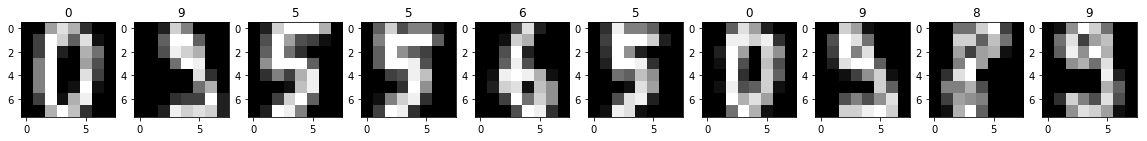

In [5]:
#Let's take a look at some images and their labels:


plt.figure(figsize=(20,6))
for element, (image, label) in enumerate(zip(digits.data[30:40],digits.target[30:40])):
    plt.subplot(1,10,element +1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('%i' % label)

In [6]:
#Let's use train_test_split to split our data
d_train, d_test, l_train, l_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0) 

In [7]:
#import your model 
#Let's try logistic regression first
from sklearn.linear_model import LogisticRegression

lr_class = LogisticRegression()
print(type(lr_class))

<class 'sklearn.linear_model.logistic.LogisticRegression'>


In [8]:
#We run a fit on our training data to train the model
lr_class.fit(d_train, l_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
#Now we predict on the trained model

lr_class.predict(d_test[0].reshape(1,-1))

array([2])

In [10]:
#do this on multiple points
lr_class.predict(d_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [ ]:
#Let's try a different classifier:
svm_class = svm.SVC(gamma=0.001)
svm_class.fit(d_train, l_train)

In [ ]:
svm_class.predict(d_test[0].reshape(1,-1))

In [ ]:
svm_class.predict(d_test[0:10])